In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

# Section A: Gathering data

### Section A.1: Data (The WeRateDogs Twitter archive) from the provided csv file

In [5]:
# read the downloaded csv file into a dataframe
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# use head() to take a look at the first 5 rows and all the column names
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#gather more information about the types of data, dimension of the dataframe, how many null data present etc
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Section A.2: Data from the image_predictions file downloaded programatically from the url

In [5]:
# use requests to send request with the url to the server and save the response in the variable image_predictions_response
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_response=requests.get(url)

In [7]:
# save the byte content of the response in a file named 'image-predictions.tsv'
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(image_predictions_response.content)

In [6]:
# read the file into a dataframe
image_prediction=pd.read_csv('image-predictions.tsv', sep='\t')

In [9]:
#explore the data
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
#get more information
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Section A.3: Data obtained by quering the twitter API

In [13]:
# create an api pbject
consumer_key = '***********'
consumer_secret = '***********'
access_token = '***********'
access_secret = '*********'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [42]:
#run a test run with the api to see the status data we get and the json
tweet_test=api.get_status(892420643555336193, tweet_mode='extended')
tweet_test
tweet_test._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [8]:
#create the tweet_json.txt file if it doesn't exist for storing the json of each tweet_id
file_name='tweet_json.txt'
if not os.path.exists(file_name):
    with open (file_name, 'w'): pass

In [16]:
#list fot holding the tweet_ids that would give rise to an exception when downloading their json, such as if the tweet
# has been deleted from the archive.
error_list=[]

In [17]:
#use for loop to iterate over each id in tweet_id of twitter_archive dataframe.
#get_status() returns the status of the id. tweet_mode-extended is selected to get non-truncated tweet text.
#Append mode, 'a' is used to append or add data to the existing data of file, if any. 
#when a file is opened in write mode, the file is reset, resulting in deletion of any data already
#present in the file. So append used.
#encoding is used to get the proper characters.
#try-except bock used to catch the tweet_ids that have been deleted from the archive.
for i in twitter_archive.tweet_id:
    try:
        tweet = api.get_status(i, tweet_mode='extended')
        print(i)
        with open(file_name, 'a', encoding='UTF-8') as file:
            json.dump(tweet._json, file)
            file.write('\n')
    except Exception as e:
        print("{} has been deleted".format(i))
        error_list.append(i)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257 has been deleted
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
88226811019936

822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327

766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097

Rate limit reached. Sleeping for: 27


758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368 has been deleted
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
752173152931807232
751950017322246144
751937170840121344
75183039438379

705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249383937
700847567345688576
700796979434098688
700747788515020802
700518061187

678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944
677187300187611136
676975532580409345
676957860086095872
676949632774234114


Rate limit reached. Sleeping for: 556


676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956750848
675707330206547968
675706639471788032
675534494439489536
675531475945

668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029539841
667192066997374976
667188689915

In [18]:
#list of tweet_ids that have been deleted
error_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 867051520902168576,
 866816280283807744,
 861769973181624320,
 859851578198683649,
 856330835276025856,
 854482394044301312,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288,
 673612854080196609,
 671151324042559489]

In [19]:
# number of deleted tweets
len(error_list)

23

In [39]:
updated_error_list=[]

In [40]:
#checking these error_list again as I saw atleast 2 that had status by using here https://twitter.com/statuses/ID
for i in error_list:
    try:
        tweet = api.get_status(i, tweet_mode='extended')
        print(i)
        with open(file_name, 'a', encoding='UTF-8') as file:
            json.dump(tweet._json, file)
            file.write('\n')
    except Exception as e:
        print("{} has been deleted".format(i))
        updated_error_list.append(i)

888202515573088257 has been deleted
873697596434513921 has been deleted
872668790621863937 has been deleted
872261713294495745 has been deleted
869988702071779329 has been deleted
867051520902168576
866816280283807744 has been deleted
861769973181624320 has been deleted
859851578198683649
856330835276025856
854482394044301312
845459076796616705 has been deleted
842892208864923648 has been deleted
837012587749474308 has been deleted
827228250799742977 has been deleted
812747805718642688 has been deleted
802247111496568832 has been deleted
775096608509886464 has been deleted
770743923962707968 has been deleted
754011816964026368 has been deleted
680055455951884288 has been deleted
673612854080196609
671151324042559489


In [41]:
# so there are 17 tweets that had been deleted
len(updated_error_list)

17

In [9]:
#find the rating, name, stage, no of images, retweet_count, favorite_count of the dogs from the json data of the tweets.
#add these values to keys in a dictionary and append it to df_tweet_list
#error_tweet is a list of tweet_ids that would give rise to exception
df_tweet_list=[]
error_tweet=[]
with open(file_name, 'r') as json_file:
    for line in json_file:
            data = json.loads(line)
            tweet_id=data["id"]
            try:
                name=re.search('(?<=hello to ).*?(?=\.)|(?<=Meet ).*?(?=\.)|(?<=This is )[^a-z].*?(?=[\.\,])', data['full_text'])
                rating=re.findall('(\d*)\/10', data['full_text'])[0]
                stage=re.search(('doggo|pupper|floofer|floof|puppo'), data['full_text'])
                retweet_count=data['retweet_count']
                favorite_count=data['favorite_count']
                no_of_mediafiles=len(data["extended_entities"]["media"])
                count=0
                for i in range(no_of_mediafiles):
                        if data["extended_entities"]["media"][i]["type"]=="photo":
                            count=count+1
                number_of_images=count
                df_tweet_list.append({'tweet_id': str(tweet_id),
                                'name': str(name),
                                'rating': int(rating),
                               'stage': str(stage),
                               'retweet_count': int(retweet_count),
                               'favorite_count': int(favorite_count),
                               'number_of_images': int(number_of_images)})
            except Exception as e:
                error_tweet.append(tweet_id)
                
twitter_archive_from_api=pd.DataFrame(df_tweet_list, columns = ['tweet_id', 'name', 'rating', 
                                                            'stage', 'retweet_count', 'favorite_count', 'number_of_images'])

In [46]:
#list of tweets that gave rise to exception. After opening a few using https://twitter.com/statuses/ID we saw that
#they are reply/ retweets to other people's tweets or to WeRateDogs own original tweets.
error_tweet

[886267009285017600,
 886054160059072513,
 885518971528720385,
 884247878851493888,
 881633300179243008,
 879674319642796034,
 879130579576475649,
 878604707211726852,
 878404777348136964,
 878316110768087041,
 876537666061221889,
 875097192612077568,
 874434818259525634,
 873337748698140672,
 871166179821445120,
 871102520638267392,
 870726314365509632,
 868639477480148993,
 866720684873056260,
 866094527597207552,
 863471782782697472,
 863427515083354112,
 860981674716409858,
 860177593139703809,
 858860390427611136,
 857214891891077121,
 857062103051644929,
 856602993587888130,
 856330835276025856,
 856288084350160898,
 855862651834028034,
 855860136149123072,
 855857698524602368,
 855818117272018944,
 855245323840757760,
 855138241867124737,
 852936405516943360,
 850333567704068097,
 849668094696017920,
 848213670039564288,
 847978865427394560,
 847617282490613760,
 846505985330044928,
 846139713627017216,
 845098359547420673,
 843981021012017153,
 841320156043304961,
 840761248237

In [58]:
len(error_tweet)

287

twitter_archive_from_api.head(10)

In [45]:
twitter_archive_from_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 7 columns):
tweet_id            2052 non-null object
name                2052 non-null object
rating              2052 non-null int64
stage               2052 non-null object
retweet_count       2052 non-null int64
favorite_count      2052 non-null int64
number_of_images    2052 non-null int64
dtypes: int64(4), object(3)
memory usage: 112.3+ KB


# Section B: Assessing data

For our analysis we need original tweets with original ratings that have images. So no retweets or other media files.

#### Visual assessment:
Visually we looked 'twitter-archive-enhanced.csv'using excel. A glimpse said that there are some issues in the name variable. Also I found that some numerator had 3 digits in it so in the hundreds, which was strange. If these are still present in the master dataframe we will drop those records

#### Programmatically the following issues were obtained:
    

In [49]:
# name variable in twitter_archive
pd.set_option("display.max_rows", None)
twitter_archive.name.value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Tucker             10
Lola               10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
Bailey              7
Toby                7
Daisy               7
Buddy               7
an                  7
Bella               6
Stanley             6
Oscar               6
Dave                6
Jax                 6
Scout               6
Leo                 6
Koda                6
Rusty               6
Milo                6
Jack                6
Larry               5
Bentley             5
Phil                5
Louis               5
very                5
Sunny               5
George              5
Alfie               5
Finn                5
Oakley              5
Sammy               5
Gus                 5
Chester             5
Bear                4
Clarence            4
Sophie              4
Reggie    

 #### Quality issue 1: We can see some a, an, the, very, quite, just, by, unacceptable etc. So these are lowercase letters. We can see one that has the name Bookstore. we will see what that is. So we find the tweet_id as below and checked https://twitter.com/dog_rates/status/747600769478692864. We see that Bookstore is actually a dog. In that link there are actually two dogs and two ratings. But only one's name and rating has been extracted.

In [52]:
twitter_archive[twitter_archive.name=='Bookstore']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1007,747600769478692864,NaN,NaN,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,None,None,None,None


#### Quality issue 2: We can see some dogs have been included as having two stages.Both as doggo and floofer  in the following example. From the twitter link we see that it is a floofer. This actually became visible when we were melting these variables while cleaning, and the value_counts() didn't match up with the original twitter_archive dataframe's value_counts(). This will be shown in the cleaning section.

In [55]:
twitter_archive[twitter_archive.tweet_id==854010172552949760]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None


#### Quality issue 3:The data type of timestamp in twitter_archive is object. It should be datetime object. We also need to convert the tweet_id to string object as it is too big to be considered as an integer.

#### Quality issue 4:twitter_archive has tweets that have in_reply_to fields (78 records) and retweeted fields (181 records) filled. These are retweets or reply to original tweets.

We will extract the date and time from the timestamp column in a separate column. So we will end up with 2 columns with date time. The source column contains the source from which device the tweet originated. We don't need that for our analysis part.

#### Quality issue 5: image_predictions dataframe have images matched to dogs and other things. While extracting the dog_breed from here we need to make sure we get record for images that are of dogs. We also fix the datatype of tweet_id column. 

#### Quality issue 6:twitter_archive_api need to have name and stage fixed. It has a lot of charaters now along with the name and stage of the dog.

#### Quality issue 7:We see from below that there are 82 records with no images. We need to dop these.

In [60]:
twitter_archive_from_api.number_of_images.value_counts()

1    1449
2     297
4     118
3     106
0      82
Name: number_of_images, dtype: int64

#### Quality issue 8: After merging twitter_archive and twitter_archive_from_api, we will see if the name, stage and ratings obtained from the api matches with the ones we had in twitter_archive the data that was provided to us. And if we need to change it.

The tweet_ids (2052 records) in twitter_archive_from_api are original tweets. Retweeted tweets will the extended_entities key nested in retweeted_status key for images. Since we selected to get our data of images from extended_entities that is not nested, so our data consists only of original tweets.

#### Quality issue 9: We need to rename the columns of the master dataframe with more descriptive column name for better representation of their value. Then we need to reorder the columns of the master dataframe in a logical order

#### Tidiness issue 1: In twitter_archive the dog stages has four columns doggo, pupper, puppo, floofer. We need to melt this into one column. And then drop the duplicate records

#### Tidiness issue 2: We need the retweet_count, favorite_count and number of images from the twitter_archive_from_api to merge with the master dataframe.

#### Tidiness issue 3: We select the 'tweet_id', 'dog_breed', 'confidence_score' columns to the new dataframe to merge to our master dataframe.

# Section C: Cleaning the data

In [10]:
# create a copy of the datasets
twitter_archive_clean=twitter_archive.copy()
image_prediction_clean=image_prediction.copy()
twitter_archive_from_api_clean=twitter_archive_from_api.copy()

#### Tidiness issue 1:
#### Define: 
We need to use the melt function to combine the four columns doggo, floofer, pupper and puppo into one column dog_stage. Then we need to drop the column with the variable names as the dog_stage column will have all the stages noted.

#### Code:

In [11]:
#melt the four columns doggo, floofer, pupper and puppo into one column dog_stage
twitter_archive_clean=pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
                                        'timestamp', 'source', 'text', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'retweeted_status_timestamp', 
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 
                                       'name'],
                           value_name='dog_stage').drop('variable', axis=1)

In [69]:
#test to see if the new column, dog_stage was incorporated
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [74]:
# test to see if the new column, dog_stage was incorporated and its datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 14 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
dog_stage                     9424 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 1.0+ MB


In [75]:
#after melting the number of dogs for each dog
twitter_archive_clean.dog_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

We now check with before the melt function was applied

In [76]:
print("pupper: {}". format(twitter_archive.pupper.value_counts()))
print("doggo: {}". format(twitter_archive.doggo.value_counts()))
print("puppo: {}". format(twitter_archive.puppo.value_counts()))
print("floofer: {}". format(twitter_archive.floofer.value_counts()))

pupper: None      2099
pupper     257
Name: pupper, dtype: int64
doggo: None     2259
doggo      97
Name: doggo, dtype: int64
puppo: None     2326
puppo      30
Name: puppo, dtype: int64
floofer: None       2346
floofer      10
Name: floofer, dtype: int64


We see a 4 times increase in the number of records so we need to drop the duplicates

Code continued to fix the quality issue raised due to applying melting

In [12]:
#first we find the tweets that are not None in the dog_stage column. We save it in a dataframe
df_dog_stage=twitter_archive_clean[twitter_archive_clean.dog_stage!='None']

In [13]:
#next we find the tweet_ids that are not in df_dog_stage dataframe. These are tweets with None values.
df_dog_stage_none=twitter_archive_clean[~twitter_archive_clean.tweet_id.isin(df_dog_stage.tweet_id)]

In [14]:
#Next we combine the two dataframes df_dog_stage that has tweet_ids with values in dog_stage and df_dog_stage_none with
#tweet_ids that are not present in the first dataframe. We drop the duplicates
twitter_archive_clean=pd.concat([df_dog_stage, df_dog_stage_none]).drop_duplicates('tweet_id')

In [179]:
#test to see if the duplicate records were deleted
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 9 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 276.1+ KB


We have successfully melted the four columns into one column dog_stage

In [102]:
#now we check the dog_stage column in twitter_archive_clean
twitter_archive_clean.dog_stage.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

We now see different numbers. We found pupper, puppo and floofer has 12, 1 and 1 dog less after melting and dropping duplicates than before.

#### Quality issue 2

#### Define:
Some records had two stages for one record. We will find these rows, check the text or open the tweet and add the correct one. 

We now write a function to help us check the stages of dog

In [129]:
# to clean our code we define a function to identify the records that have such discrepancy.
def check_dog(df, df_clean, stage_string):
    #find tweet_ids that have say 'pupper' in twitter_archive, the original dataframe
    df_old=df[df[stage_string]==stage_string]
    #find tweets ids in twitter_archive_clean which are 'pupper' in the original dataframe and absent in new dataframe.
    df_not=df_clean[df_clean.tweet_id.isin(df_old['tweet_id'])]
    # print to see what other dog stages are included here, incase we need to change 'doggo' in return statement
    print(df_not.dog_stage.value_counts())
    #return a dataframe containing records that are not identified as 'pupper'
    return (df_not[df_not.dog_stage!=stage_string])

In [180]:
#find the tweet records where pupper went missing from the clean dataframe.
check_dog(twitter_archive, twitter_archive_clean, 'pupper')

pupper    245
doggo      12
Name: dog_stage, dtype: int64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo


In [15]:
#Check the original twitter_archive for one of these
twitter_archive[twitter_archive.tweet_id==817777686764523521]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None


We see it has values in both doggo and pupper and hence the pupper went missing.

We check these tweets manually to fix them (after exploring each of the tweet) as follows:

In [16]:
#there are two tweets that are right away retweets as they direct to the original tweet page.https://twitter.com/dog_rates/status/ID
#we drop these tweets using the indices from the dataframe
twitter_archive_clean=twitter_archive_clean.drop([778, 822])

In [17]:
#drop rows with videos or that are not dog
twitter_archive_clean=twitter_archive_clean.drop([460, 705, 733])

In [18]:
#add pupper_doggo for 5 tweets that had images of 2 dogs-a pupper and doggo. Both getting same rating
twitter_archive_clean.loc[([531, 565, 889, 1063, 1113]), 'dog_stage']='pupper & doggo'

In [19]:
#add as a pupper
twitter_archive_clean.loc[575, 'dog_stage']='pupper'

In [20]:
#add none as it didn't have a stage
twitter_archive_clean.loc[956, 'dog_stage']='None'

check for puppo

In [186]:
#find the tweet records where puppo went missing from the clean dataframe.
check_dog(twitter_archive, twitter_archive_clean, 'puppo')

puppo    29
doggo     1
Name: dog_stage, dtype: int64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo


In [21]:
#add puppo to correct the dog_stage
twitter_archive_clean.loc[191, 'dog_stage']='puppo'

In [188]:
#find the tweet records where floofer went missing from the clean dataframe.
check_dog(twitter_archive, twitter_archive_clean, 'floofer')

floofer    9
doggo      1
Name: dog_stage, dtype: int64


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo


Correct for floofer

In [22]:
#add floofer to correct the dog_stage
twitter_archive_clean.loc[200, 'dog_stage']='floofer'

In [23]:
#test the twitter_clean dataframe now
twitter_archive_clean.dog_stage.value_counts()

None              1977
pupper             246
doggo               83
puppo               30
floofer             10
pupper & doggo       5
Name: dog_stage, dtype: int64

That all looks good now so along with tidiness 1 we solved quality issue 2.

#### Quality issue 1: 

#### Define: 
By expanding the names column from twitter_archive we saw that names starting with lowercase letter are not names. So we replace the names with lowercase letters with '' and subsequently replace '' with 'None'.

#### Code:

In [190]:
#replace names with lowercaseletters with ''
twitter_archive_clean.name=twitter_archive_clean.name.str.replace('(^[a-z]*)', '')

In [196]:
#replace names which have '' with 'None'
twitter_archive_clean.name=twitter_archive_clean.name.replace('', 'None')

In [197]:
# test the name variable to see if there are only values with capital letter
pd.set_option("display.max_rows", None)
twitter_archive_clean.name.value_counts()

None              851
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Lola               10
Penny              10
Tucker             10
Bo                  9
Winston             9
Sadie               8
Toby                7
Bailey              7
Buddy               7
Daisy               7
Jack                6
Dave                6
Bella               6
Scout               6
Koda                6
Milo                6
Stanley             6
Rusty               6
Jax                 6
Oscar               6
Leo                 6
Louis               5
Alfie               5
Bentley             5
Sammy               5
Sunny               5
George              5
Finn                5
Oakley              5
Phil                5
Gus                 5
Larry               5
Chester             5
Bear                4
Sophie              4
Winnie              4
Carl                4
Loki                4
Bruce               4
Luna                4
Chip      

So there are now names with only capital letter.

#### Quality issue 3

#### Define: 
Convert timestamp from object to datetime object using to_datetime() and save it in a new column 'date'. We then extract the year and month from the datetime object into separate columns, 'year' and 'month' respectively. Also convert the tweet_id from integer data type to object.

#### Code:

In [198]:
# convert timestamp to datetime object
twitter_archive_clean['date']=pd.to_datetime(twitter_archive_clean.timestamp)

In [201]:
#extract the year and month into separate columns
twitter_archive_clean['year']=twitter_archive_clean['date'].dt.year
twitter_archive_clean['month']=twitter_archive_clean['date'].dt.month

In [204]:
#convert the integer to string object
twitter_archive_clean['tweet_id']=twitter_archive_clean['tweet_id'].apply(str)

In [205]:
#test to see if the code actually added the 3 columns
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,year,month
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51,2017,7
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42,2017,7


In [206]:
#test to see if the new 3 columns have the proper datatype
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2351 entries, 9 to 2355
Data columns (total 17 columns):
tweet_id                      2351 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2351 non-null object
source                        2351 non-null object
text                          2351 non-null object
retweeted_status_id           179 non-null float64
retweeted_status_user_id      179 non-null float64
retweeted_status_timestamp    179 non-null object
expanded_urls                 2292 non-null object
rating_numerator              2351 non-null int64
rating_denominator            2351 non-null int64
name                          2351 non-null object
dog_stage                     2351 non-null object
date                          2351 non-null datetime64[ns]
year                          2351 non-null int64
month                         2351 non-null int64
dtypes: datetime64[ns](1)

#### Quality issue 4

#### Define:
Tweets that have values in columns 'in_reply_to_status_id ', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' are not original tweets and hence we need to remove these rows using mask. And then we will drop those empty columns.    

We will also drop timestamp as it represent repititious data as the date column.

We will drop source column too as we will not use it for downstream analysis. So it is unnecessary

#### Code:

In [210]:
#remove 'in_reply_to not null fields using mask
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]

In [211]:
#remove 'retweeted_status_ not null fields using mask
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [212]:
#test to see if the mentioned record were deleted
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 9 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2091 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
dog_stage                     2094 non-null object
date                          2094 non-null datetime64[ns]
year                          2094 non-null int64
month                         2094 non-null int64
dtypes: datetime64[ns](1), float6

In [215]:
#drop the empty, duplicate data and unnecessary columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 
        'retweeted_status_timestamp', 'timestamp','source'],  axis=1, inplace=True)

In [216]:
#test to see if the columns were successfully dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 9 to 2355
Data columns (total 10 columns):
tweet_id              2094 non-null object
text                  2094 non-null object
expanded_urls         2091 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
date                  2094 non-null datetime64[ns]
year                  2094 non-null int64
month                 2094 non-null int64
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 180.0+ KB


That take cares of quality issue 4.

#### Quality issue 5
#### Define:
We write a function to determine if there is True in p1_dog if it is we return the breed in p1. Else we move on to check if p2_dog is True and return p2_dog if it is else we move on to check if p3_dog is True. If all are False we return unknown breed. 

The same procedure is followed to get the maximum confidence score.

We convert the tweet_id from integer to string. 

#### Tidiness issue 3

#### Define
We select the 'tweet_id', 'dog_breed', 'confidence_score' columns to a new dataframe, as we want to include these columns in our final analysis.

#### Code:

In [217]:
#define dog_breed function to separate out the 3 columns of breed into one with highest confidence ratio
def dog_breed(row):
    if row.p1_dog==True:
        return row.p1
    elif row.p2_dog==True:
        return row.p2
    elif row.p3_dog==True:
        return row.p3
    else:
        return 'unknown'

In [218]:
# define function to get the confidence score that is the highest.
def confidence_score(row):
    if row.p1_dog==True:
        return row.p1_conf
    elif row.p2_dog==True:
        return row.p2_conf
    elif row.p3_dog==True:
        return row.p3_conf
    else:
        return 0

In [221]:
# the function is applied across each row. The result saved to confidence_score column
image_prediction_clean.loc[:, 'confidence_score']=image_prediction.apply(confidence_score, axis=1)

In [222]:
# the function is applied across each row. The result saved to dog_breed column
image_prediction_clean.loc[:, 'dog_breed']=image_prediction.apply(dog_breed, axis=1)

In [223]:
#test to see if the new columns were created with the appropriate result
image_prediction_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,confidence_score,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826,redbone


In [232]:
# we also convert the tweet_id here from integer to string object
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].apply(str)

In [230]:
#We select the necessary columns for merging to the master dataframe
image_prediction_clean=image_prediction_clean[['tweet_id', 'dog_breed', 'confidence_score']]

In [234]:
#test to check the modified dataframe
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id            2075 non-null object
dog_breed           2075 non-null object
confidence_score    2075 non-null float64
dtypes: float64(1), object(2)
memory usage: 48.7+ KB


#### Quality issue 6

#### Define:
The twitter_archive_from_api_clean dataframe has name and string column will the required data in addition to other characters and word. We split the string in name and stage column using (') and extract the name and dog_stage from there.    

#### Code:

In [240]:
# first check the name and stage column to see what charater should be used to split the strings
twitter_archive_from_api_clean.head(10)

,tweet_id,name,rating,stage,retweet_count,favorite_count,number_of_images
0,892420643555336193,"<_sre.SRE_Match object; span=(8, 15), match='P...",13,None,8249,37826,1
1,892177421306343426,"<_sre.SRE_Match object; span=(8, 13), match='T...",13,None,6093,32500,1
2,891815181378084864,"<_sre.SRE_Match object; span=(8, 14), match='A...",12,None,4034,24461,1
3,891689557279858688,"<_sre.SRE_Match object; span=(8, 13), match='D...",13,None,8394,41169,1
4,891327558926688256,"<_sre.SRE_Match object; span=(8, 16), match='F...",12,None,9101,39352,2
5,891087950875897856,None,13,None,3017,19778,1
6,890971913173991426,"<_sre.SRE_Match object; span=(5, 8), match='Jax'>",13,None,1996,11569,1
7,890729181411237888,None,13,None,18322,63807,2
8,890609185150312448,"<_sre.SRE_Match object; span=(8, 12), match='Z...",13,None,4149,27192,1
9,890240255349198849,"<_sre.SRE_Match object; span=(8, 14), match='C...",14,"<_sre.SRE_Match object; span=(61, 66), match='...",7163,31168,1


In [27]:
#function for splitting the string in the col_name and extract the desired value
def extract_name_stage(df, col_name):
    for i in df[col_name]:
        if i!='None':
            df[col_name].replace(i, i.split('\'')[1], inplace=True)

In [28]:
#extract the name
extract_name_stage(twitter_archive_from_api_clean, 'name')

In [29]:
#extract the stage
extract_name_stage(twitter_archive_from_api_clean, 'stage')

In [273]:
#test to see if columns now contain the right string
twitter_archive_from_api_clean.head(2)

,tweet_id,name,rating,stage,retweet_count,favorite_count,number_of_images
0,892420643555336193,Phineas,13,None,8249,37826,1
1,892177421306343426,Tilly,13,None,6093,32500,1


In [266]:
#test to see how the extraction of name went.
twitter_archive_from_api_clean.name

0                                          Phineas
1                                            Tilly
2                                           Archie
3                                            Darla
4                                         Franklin
5                                             None
6                                              Jax
7                                             None
8                                             Zoey
9                                           Cassie
10                                            Koda
11                                           Bruno
12                                            None
13                                             Ted
14                                          Stuart
15                                          Oliver
16                                             Jim
17                                            Zeke
18                                         Ralphus
19                             

In [30]:
#test to see how many oof the dog stage was recovered
twitter_archive_from_api_clean.stage.value_counts()

None       1703
pupper      225
doggo        74
puppo        29
floof        19
floofer       2
Name: stage, dtype: int64

As can be seen the names are not perfect but we can use it to compare with the names in twitter_archive_clean. What we are really interested is the stage. We can see we have recovered 21 floof(er) from this dataset so we can use it fill any missing data in twitter_archive_clean. As a clarificatiom floof and floofer are synonyms.

#### Quality issue 7

#### Define:
We will select the tweets that does not have 0 number_of_images from twitter_archive_from_api_clean.As we need original tweets that have at least 1 image

#### Code:

In [32]:
#use mask to select number_of_images not equal to 0.
twitter_archive_from_api_clean=twitter_archive_from_api_clean[twitter_archive_from_api_clean.number_of_images!=0]

In [33]:
# test to see if all 0 images were cleared
twitter_archive_from_api_clean.number_of_images.value_counts()

1    1449
2     297
4     118
3     106
Name: number_of_images, dtype: int64

#### Quality issue 8

#### Define: 
We will merge twitter_archive and twitter_archive_from_api_clean to get a master dataframe and then check the names, stages, rating of the dogs.

After checking we will drop the name_y, stage, rating columns from df_master to get rid of repeated columns

#### Code:

In [284]:
#merge 2 dataframes
df_master=pd.merge(twitter_archive_clean, twitter_archive_from_api_clean, on="tweet_id", how='inner')

In [315]:
#test to see if the merge worked
df_master.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name_x,dog_stage,date,year,month,name_y,rating,stage,retweet_count,favorite_count,number_of_images
0,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51,2017,7,Cassie,14,doggo,7163,31168,1
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42,2017,7,Yogi,12,doggo,2897,19889,1
2,872967104147763200,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,2017-06-09 00:02:31,2017,6,None,12,doggo,5311,26807,2
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04 23:56:03,2017,6,Napolean,12,doggo,3407,19872,2
4,869596645499047938,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,2017-05-30 16:49:31,2017,5,Scout,12,doggo,3110,15787,2


In [295]:
#check to see all the columns in the new dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 16 columns):
tweet_id              1881 non-null object
text                  1881 non-null object
expanded_urls         1881 non-null object
rating_numerator      1881 non-null int64
rating_denominator    1881 non-null int64
name_x                1881 non-null object
dog_stage             1881 non-null object
date                  1881 non-null datetime64[ns]
year                  1881 non-null int64
month                 1881 non-null int64
name_y                1881 non-null object
rating                1881 non-null int64
stage                 1881 non-null object
retweet_count         1881 non-null int64
favorite_count        1881 non-null int64
number_of_images      1881 non-null int64
dtypes: datetime64[ns](1), int64(8), object(7)
memory usage: 249.8+ KB


So we see that when there is more than one dog, only the first name was recorded.We will keep it that way as we won't be using names in our analysis. We will check the data in the following cells for dog_stage correction.

In [317]:
#increase text width so that it is readable.
pd.set_option('display.max_colwidth', -1)
#use mask to identify the rows where dog_stage is not equal to stage
df_master[df_master.dog_stage!=df_master.stage]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name_x,dog_stage,date,year,month,name_y,rating,stage,retweet_count,favorite_count,number_of_images
5,858843525470990336,I have stumbled puppon a doggo painting party. They're looking to be the next Pupcasso or Puppollock. All 13/10 would put it on the fridge https://t.co/cUeDMlHJbq,https://twitter.com/dog_rates/status/858843525470990336/photo/1,13,10,None,doggo,2017-05-01 00:40:27,2017,5,None,13,puppo,3526,15611,1
7,854010172552949760,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,floofer,2017-04-17 16:34:26,2017,4,None,11,doggo,3246,16464,2
25,819006400881917954,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14,10,Sunny,doggo,2017-01-11 02:21:57,2017,1,Sunny,14,None,20521,47792,4
26,819004803107983360,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,doggo,2017-01-11 02:15:36,2017,1,Bo,14,None,39829,91704,4
31,808106460588765185,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,pupper & doggo,2016-12-12 00:29:28,2016,12,None,12,pupper,2393,9297,1
32,801115127852503040,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,pupper,2016-11-22 17:28:25,2016,11,Bones,12,doggo,2277,8608,2
43,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,pupper & doggo,2016-07-31 16:50:42,2016,7,Maggie &amp; Lila,12,doggo,2039,6269,2
49,752660715232722944,Hooman used Pokeball\n*wiggle*\n*wiggle*\nDoggo broke free \n10/10 https://t.co/bWSgqnwSHr,"https://twitter.com/dog_rates/status/752660715232722944/photo/1,https://twitter.com/dog_rates/status/752660715232722944/photo/1",10,10,None,doggo,2016-07-12 00:27:52,2016,7,None,10,None,1684,4624,2
50,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,None,2016-07-09 01:08:47,2016,7,None,5,doggo,1189,4612,1
52,748932637671223296,Say hello to Divine Doggo. Must be magical af. 13/10 would be an honor to pet https://t.co/BbcABzohKb,https://twitter.com/dog_rates/status/748932637671223296/photo/1,13,10,Divine,doggo,2016-07-01 17:33:49,2016,7,Divine Doggo,13,None,2413,6108,1


In [328]:
# resets so that in the rest of the report it doesn't show the extended version
pd.reset_option('^display.', silent=True)

We found 2 floofer, 2 doggo and 12 puppers. The changes are made using the indices.

In [302]:
df_master.loc[([300, 704]), 'dog_stage']='floofer'
df_master.loc[([446, 553]), 'dog_stage']='doggo'
df_master.loc[([852, 873, 1007, 1282, 1288, 1335, 1337, 1412, 1426, 1439, 1485, 1673]), 'dog_stage']='pupper'

In [303]:
#check one to see if it was applied
df_master[df_master.tweet_id=='669993076832759809']

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name_x,dog_stage,date,year,month,name_y,rating,stage,retweet_count,favorite_count,number_of_images
1673,669993076832759809,This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK,https://twitter.com/dog_rates/status/669993076832759809/photo/1,9,10,Zoey,pupper,2015-11-26 21:36:12,2015,11,Zoey,9,pupper,86,328,1


In [318]:
#check discrepencies in rating and rating_numerator
df_master[df_master.rating_numerator!=df_master.rating]

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name_x,dog_stage,date,year,month,name_y,rating,stage,retweet_count,favorite_count,number_of_images
898,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,2016-06-08 02:41:38,2016,6,None,14,None,14088,36235,4
965,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,2016-04-21 02:25:47,2016,4,None,13,None,1652,4254,1
993,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,2016-04-03 01:36:11,2016,4,Bluebert,11,None,222,2453,1
1299,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7,11,Darrel,None,2016-01-01 16:30:13,2016,1,Darrel,10,None,17708,38514,1
1860,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1,2,None,None,2015-11-16 16:11:11,2015,11,None,9,None,63,142,1


In [320]:
# fix the issues
df_master.loc[898, 'rating_numerator']=14
df_master.loc[965, 'rating_numerator']=13
df_master.loc[993, 'rating_numerator']=11
df_master.loc[1299, 'rating_numerator']=10
df_master.loc[1860, 'rating_numerator']=9

In [321]:
#check one to see if it was applied
df_master[df_master.tweet_id=='666287406224695296']

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name_x,dog_stage,date,year,month,name_y,rating,stage,retweet_count,favorite_count,number_of_images
1860,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,2,None,None,2015-11-16 16:11:11,2015,11,None,9,None,63,142,1


In [325]:
#now we can drop the extra columns
df_master=df_master.drop(['name_y', 'rating', 'stage'], axis=1)

This also takes care of tidiness issue 2, which was to have the new master dataframe with the columns retweet_count, favorite_count and number_of_images from the twitter_archive_from_api_clean.

In [327]:
#test to see if we have the proper columns
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 13 columns):
tweet_id              1881 non-null object
text                  1881 non-null object
expanded_urls         1881 non-null object
rating_numerator      1881 non-null int64
rating_denominator    1881 non-null int64
name_x                1881 non-null object
dog_stage             1881 non-null object
date                  1881 non-null datetime64[ns]
year                  1881 non-null int64
month                 1881 non-null int64
retweet_count         1881 non-null int64
favorite_count        1881 non-null int64
number_of_images      1881 non-null int64
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 285.7+ KB


In [332]:
#We now merge the image_predictions_clean with df_master to get the dog_breed and confidence_score on tweet_id. We want all data from
#df_master so we use how='left'
df_master=pd.merge(df_master, image_prediction_clean, on="tweet_id", how='left')

In [334]:
#test to see if the merge was successful
df_master.head()

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name_x,dog_stage,date,year,month,retweet_count,favorite_count,number_of_images,dog_breed,confidence_score
0,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,2017-07-26 15:59:51,2017,7,7163,31168,1,Pembroke,0.511319
1,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,2017-07-09 21:29:42,2017,7,2897,19889,1,German_shepherd,0.707046
2,872967104147763200,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,2017-06-09 00:02:31,2017,6,5311,26807,2,Labrador_retriever,0.476913
3,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,2017-06-04 23:56:03,2017,6,3407,19872,2,komondor,0.974781
4,869596645499047938,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,doggo,2017-05-30 16:49:31,2017,5,3110,15787,2,Chihuahua,0.955156


In [335]:
#test to see the columns and data types in the new dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 15 columns):
tweet_id              1881 non-null object
text                  1881 non-null object
expanded_urls         1881 non-null object
rating_numerator      1881 non-null int64
rating_denominator    1881 non-null int64
name_x                1881 non-null object
dog_stage             1881 non-null object
date                  1881 non-null datetime64[ns]
year                  1881 non-null int64
month                 1881 non-null int64
retweet_count         1881 non-null int64
favorite_count        1881 non-null int64
number_of_images      1881 non-null int64
dog_breed             1881 non-null object
confidence_score      1881 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(7), object(6)
memory usage: 235.1+ KB


#### Quality issue 9:

#### Define:
We rename the column names with descriptive names.

We reorder df_master dataframe's columns in a logical order    

#### Code:

In [336]:
#rename columns
df_master.rename(columns={'tweet_id': 'tweet_id', 'date': 'tweet_date', 'year': 'tweet_year', 'month': 'tweet_month', 'text': 'tweet_text',
                          'name_x': 'dog_name', 'dog_stage': 'dog_stage', 'rating_numerator': 'dog_score', 'rating_denominator': 'total_score', 'retweet_count': 'number_of_times_retweeted', 
                   'favorite_count': 'number_of_times_loved', 'number_of_images': 'number_of_dog_images', 'dog_breed': 'dog_breed',
                  'confidence_score': 'confidence_of_true_recognition', 'expanded_urls': 'tweet_expanded_urls'}, inplace=True)

In [338]:
#reorder columns
df_master=df_master[['tweet_id', 'tweet_date', 'tweet_year', 'tweet_month', 'tweet_text', 'dog_name', 'dog_stage', 'dog_score', 'total_score', 'number_of_times_retweeted',
          'number_of_times_loved', 'number_of_dog_images', 'dog_breed', 'confidence_of_true_recognition', 'tweet_expanded_urls']]

In [340]:
#test to see if the rename and reodering worked
df_master.head()

,tweet_id,tweet_date,tweet_year,tweet_month,tweet_text,dog_name,dog_stage,dog_score,total_score,number_of_times_retweeted,number_of_times_loved,number_of_dog_images,dog_breed,confidence_of_true_recognition,tweet_expanded_urls
0,890240255349198849,2017-07-26 15:59:51,2017,7,This is Cassie. She is a college pup. Studying...,Cassie,doggo,14,10,7163,31168,1,Pembroke,0.511319,https://twitter.com/dog_rates/status/890240255...
1,884162670584377345,2017-07-09 21:29:42,2017,7,Meet Yogi. He doesn't have any important dog m...,Yogi,doggo,12,10,2897,19889,1,German_shepherd,0.707046,https://twitter.com/dog_rates/status/884162670...
2,872967104147763200,2017-06-09 00:02:31,2017,6,Here's a very large dog. He has a date later. ...,None,doggo,12,10,5311,26807,2,Labrador_retriever,0.476913,https://twitter.com/dog_rates/status/872967104...
3,871515927908634625,2017-06-04 23:56:03,2017,6,This is Napolean. He's a Raggedy East Nicaragu...,Napolean,doggo,12,10,3407,19872,2,komondor,0.974781,https://twitter.com/dog_rates/status/871515927...
4,869596645499047938,2017-05-30 16:49:31,2017,5,This is Scout. He just graduated. Officially a...,Scout,doggo,12,10,3110,15787,2,Chihuahua,0.955156,https://twitter.com/dog_rates/status/869596645...


In [339]:
#check to see if we the correct variable names and order. Also the correct datatype for each variable
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1881 entries, 0 to 1880
Data columns (total 15 columns):
tweet_id                          1881 non-null object
tweet_date                        1881 non-null datetime64[ns]
tweet_year                        1881 non-null int64
tweet_month                       1881 non-null int64
tweet_text                        1881 non-null object
dog_name                          1881 non-null object
dog_stage                         1881 non-null object
dog_score                         1881 non-null int64
total_score                       1881 non-null int64
number_of_times_retweeted         1881 non-null int64
number_of_times_loved             1881 non-null int64
number_of_dog_images              1881 non-null int64
dog_breed                         1881 non-null object
confidence_of_true_recognition    1881 non-null float64
tweet_expanded_urls               1881 non-null object
dtypes: datetime64[ns](1), float64(1), int64(7), object(6)
memory 

# Section D: Save the master dataset

we save the  newly combined dataframe as twitter_master_dataset.csv. We set index=False to avoid saving with an unnamed column.

In [170]:
#save the master datframe in a csv file
df_master.to_csv('twitter_master_dataset.csv', index=False)

In [2]:
#read the data from csv file
df_master=pd.read_csv('twitter_master_dataset.csv')

In [6]:
# save in a sqlite database. For that we create an SQLAlchemy engine and an empty database named twitter_we_rate_dogs.db
engine=create_engine('sqlite:///twitter_we_rate_dogs.db')

In [9]:
#store the master dataframe in a table called master in twitter_we_rate_dogs.db.
df_master.to_sql('master', engine, index=False, if_exists='replace')

In [8]:
#read the database data into a pandas dataframe
df_master=pd.read_sql('SELECT * FROM master', engine)

In [8]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1881 entries, 0 to 1880
Data columns (total 15 columns):
tweet_id                          1881 non-null object
tweet_date                        1881 non-null object
tweet_year                        1881 non-null int64
tweet_month                       1881 non-null int64
tweet_text                        1881 non-null object
dog_name                          1881 non-null object
dog_stage                         1881 non-null object
dog_score                         1881 non-null int64
total_score                       1881 non-null int64
number_of_times_retweeted         1881 non-null int64
number_of_times_loved             1881 non-null int64
number_of_dog_images              1881 non-null int64
dog_breed                         1881 non-null object
confidence_of_true_recognition    1881 non-null float64
tweet_expanded_urls               1881 non-null object
dtypes: float64(1), int64(7), object(7)
memory usage: 220.5+ KB


# Section E : Analyzing and visualizing the data

In [3]:
# count number of dogs in each breed
df_master.groupby('dog_breed').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,dog_breed,counts
108,unknown,282
87,golden_retriever,150
36,Labrador_retriever,98
48,Pembroke,93
15,Chihuahua,87
99,pug,62
106,toy_poodle,50
80,chow,47
49,Pomeranian,39
54,Samoyed,36


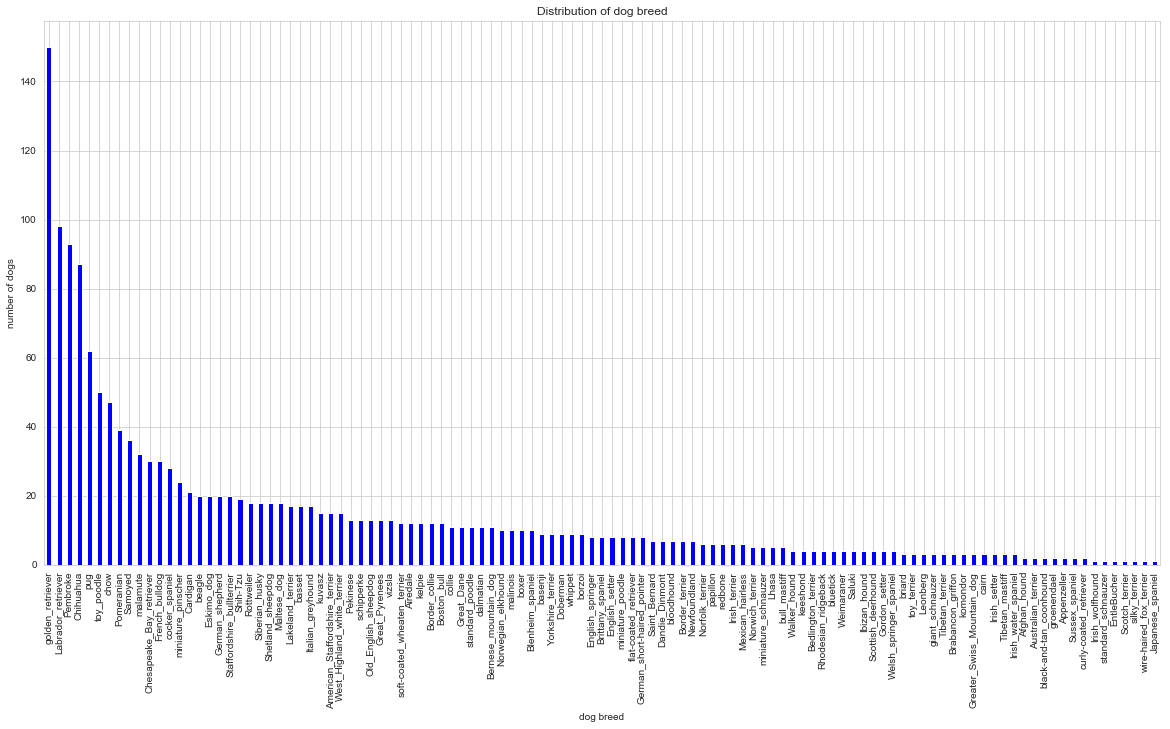

In [5]:
#plot the counts for each dog breed
df_master[df_master['dog_breed']!='unknown']['dog_breed'].value_counts().plot(kind='bar',
                                    color='b',                                          
                                    figsize=(20,10),
                                    title="Distribution of dog breed");
plt.xlabel('dog breed');
plt.ylabel('number of dogs');

We can see that golden_retriever is the most tweeted dog. Followed by Labrador retriever, Pembroke and Chihuahua.

In [43]:
#summary statistics of dog_score grouped by breed
df_master.groupby('dog_breed')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_breed,,,,,,,,
Afghan_hound,2.0,8.000000,7.071068,3.0,5.50,8.0,10.50,13.0
Airedale,12.0,9.833333,2.249579,6.0,9.25,10.5,11.25,12.0
American_Staffordshire_terrier,16.0,10.312500,3.070695,0.0,10.00,11.0,12.00,13.0
Appenzeller,2.0,11.000000,2.828427,9.0,10.00,11.0,12.00,13.0
Australian_terrier,2.0,11.500000,2.121320,10.0,10.75,11.5,12.25,13.0
Bedlington_terrier,4.0,10.500000,3.696846,6.0,8.25,11.0,13.25,14.0
Bernese_mountain_dog,11.0,11.272727,1.103713,10.0,10.00,12.0,12.00,13.0
Blenheim_spaniel,10.0,11.100000,1.100505,9.0,10.25,11.5,12.00,12.0
Border_collie,12.0,10.583333,2.503028,4.0,9.75,11.5,12.00,13.0


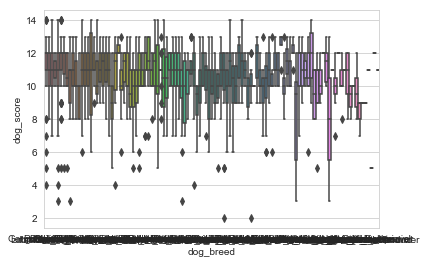

In [6]:
#boxplot of dog_score grouped by dog breed
sns.boxplot(x=df_master[df_master['dog_breed']!='unknown']['dog_breed'], y=df_master.dog_score);

We see there are tweets with dog_score greater than 20. So we explore those. (We had a different figure before droping the following rows. I accidentaly clicked on this after dropping those rows causing to output this new figure)

In [61]:
#select records that had dog_score >= 20
df_master[df_master.dog_score>20]

,tweet_id,tweet_date,tweet_year,tweet_month,tweet_text,dog_name,dog_stage,dog_score,total_score,number_of_times_retweeted,number_of_times_loved,number_of_dog_images,dog_breed,confidence_of_true_recognition,tweet_expanded_urls
95,778027034220126208,2016-09-20 00:24:34.000000,2016,9,This is Sophie. She's a Jubilant Bush Pupper. ...,Sophie,pupper,27,10,1756,6937,1,clumber,0.946718,https://twitter.com/dog_rates/status/778027034...
675,786709082849828864,2016-10-13 23:23:56.000000,2016,10,"This is Logan, the Chow who lived. He solemnly...",Logan,None,75,10,6629,19337,1,Pomeranian,0.467321,https://twitter.com/dog_rates/status/786709082...
844,749981277374128128,2016-07-04 15:00:45.000000,2016,7,This is Atticus. He's quite simply America af....,Atticus,None,1776,10,2611,5348,1,unknown,0.000000,https://twitter.com/dog_rates/status/749981277...
1337,680494726643068929,2015-12-25 21:06:00.000000,2015,12,Here we have uncovered an entire battalion of ...,None,pupper,26,10,510,1788,1,kuvasz,0.438627,https://twitter.com/dog_rates/status/680494726...
1606,670842764863651840,2015-11-29 05:52:33.000000,2015,11,After so many requests... here you go.\n\nGood...,None,None,420,10,8897,24823,1,unknown,0.000000,https://twitter.com/dog_rates/status/670842764...


We see that the 95, 675 and 1337 are dogs with rating 11.27, 9.75 and 11.26 so floats. The 844 has actually 1776 score. 1606 is not a dog. So we decided to drop all these indices from the dataframe.

In [75]:
#remove those tweets
df_master=df_master.drop([95, 675, 844, 1337, 1606])

In [76]:
#check
df_master[df_master.dog_score>20]

,tweet_id,tweet_date,tweet_year,tweet_month,tweet_text,dog_name,dog_stage,dog_score,total_score,number_of_times_retweeted,number_of_times_loved,number_of_dog_images,dog_breed,confidence_of_true_recognition,tweet_expanded_urls


We now go to the save section and save the new dataframe in the csv file and update the table in the database.

In [83]:
#new dataframe, df_master
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 15 columns):
tweet_id                          1876 non-null int64
tweet_date                        1876 non-null object
tweet_year                        1876 non-null int64
tweet_month                       1876 non-null int64
tweet_text                        1876 non-null object
dog_name                          1876 non-null object
dog_stage                         1876 non-null object
dog_score                         1876 non-null int64
total_score                       1876 non-null int64
number_of_times_retweeted         1876 non-null int64
number_of_times_loved             1876 non-null int64
number_of_dog_images              1876 non-null int64
dog_breed                         1876 non-null object
confidence_of_true_recognition    1876 non-null float64
tweet_expanded_urls               1876 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 219.9+ KB


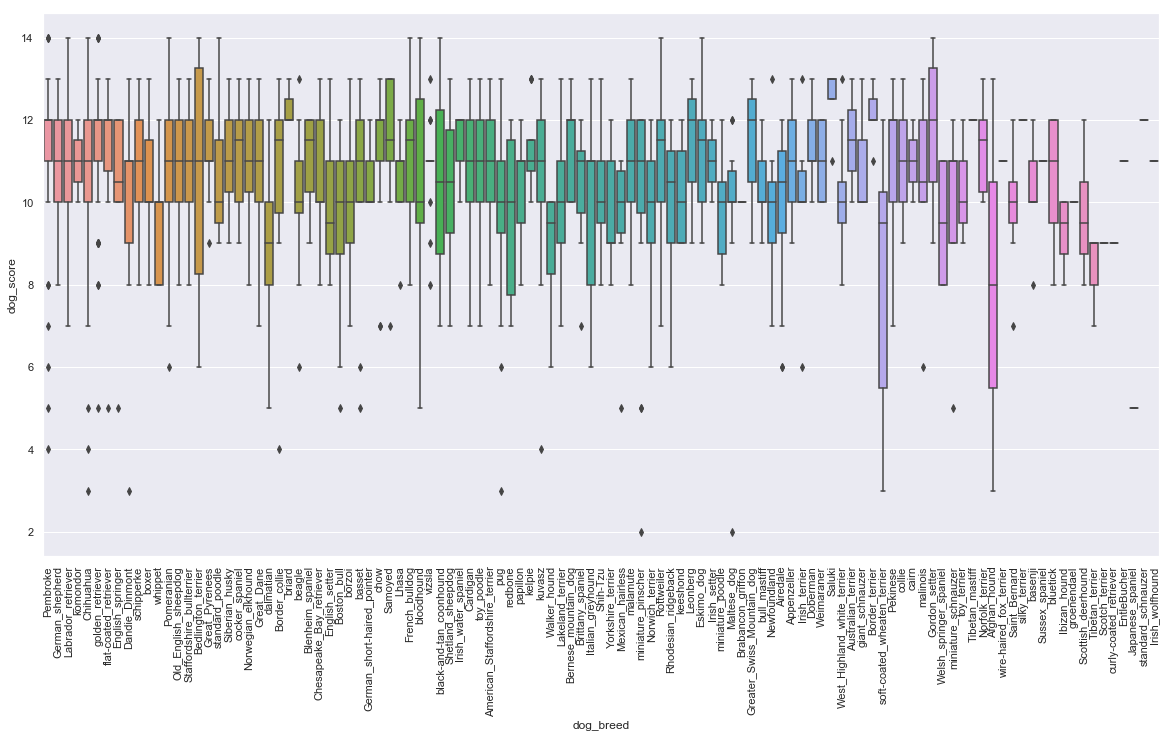

In [11]:
#boxplot of dog score grouped by dog breed

#set the figure size
sns.set(rc={'figure.figsize':(20,10)})
#plot dog_breeds that don't have unknown as values
ax=sns.boxplot(x=df_master[df_master['dog_breed']!='unknown']['dog_breed'], y=df_master.dog_score);
#rotate the labels for better view
plt.xticks(rotation=90);

Since there is quite a variation in the rating for some breed so we decided to take the median.

In [92]:
#median rating based on breed
df_master.groupby('dog_breed')['dog_score'].median().sort_values(ascending=False)

dog_breed
Saluki                         13.0
Pembroke                       12.0
golden_retriever               12.0
flat-coated_retriever          12.0
Greater_Swiss_Mountain_dog     12.0
Leonberg                       12.0
Gordon_setter                  12.0
chow                           12.0
briard                         12.0
Pekinese                       12.0
Irish_water_spaniel            12.0
silky_terrier                  12.0
standard_schnauzer             12.0
Bernese_mountain_dog           12.0
Border_terrier                 12.0
Tibetan_mastiff                12.0
Rottweiler                     11.5
cocker_spaniel                 11.5
Samoyed                        11.5
Norfolk_terrier                11.5
Blenheim_spaniel               11.5
Australian_terrier             11.5
Eskimo_dog                     11.5
Border_collie                  11.5
French_bulldog                 11.5
EntleBucher                    11.0
Sussex_spaniel                 11.0
Staffordshire_bull

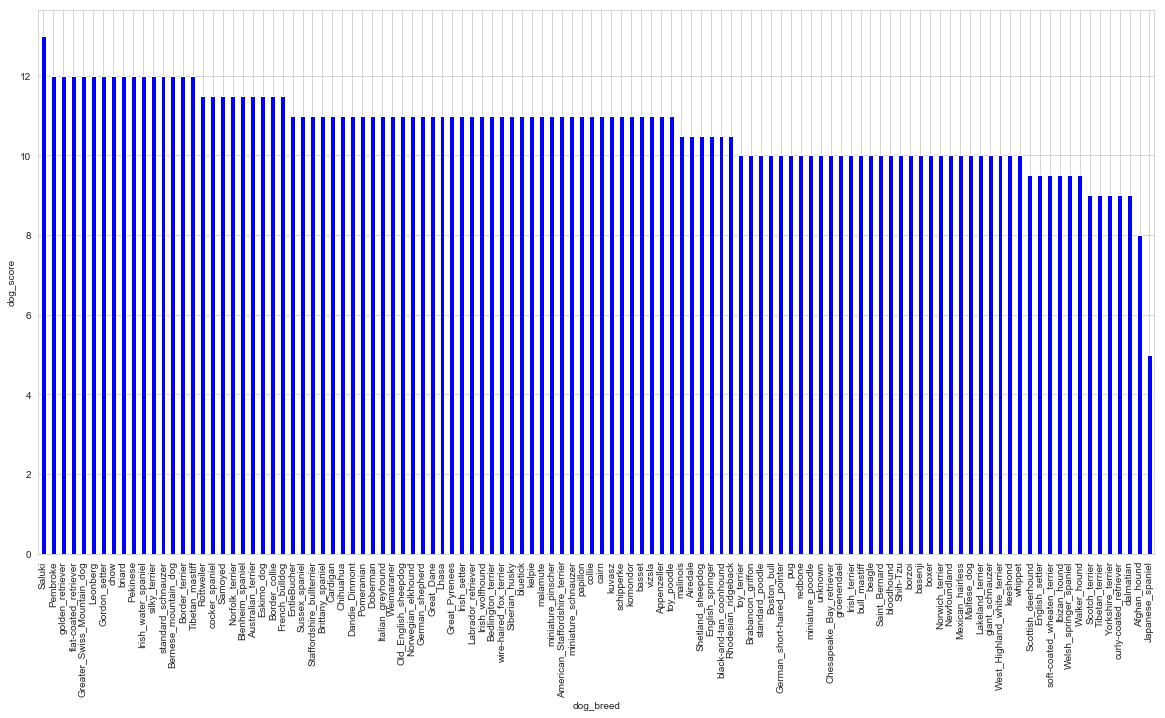

In [11]:
#plot the median value of dog score for each dog breed
df_master.groupby('dog_breed')['dog_score'].median().sort_values(ascending=False).plot(kind='bar', 
                                                                                       color='b',
                                                                                      figsize=(20,10));
plt.ylabel('dog_score');

We see that Saluki breed has the highest median score followed by Pembroke, golden_retriever etc. From the above count per breed we see that Saluki breed had only 4 dogs. So to get a proper idea on which breeds have high ratings we will choose breeds that have atleast 15 dogs or more.

In [13]:
#remove all dogs that have unknown breed
df_master_all_breed=df_master[df_master['dog_breed']!='unknown']

In [14]:
#determine the count of each dog_breed
breed_count=df_master_all_breed.groupby('dog_breed').size()

In [15]:
# filter those dogs with counts >=15
breed_count_15_or_more=breed_count[breed_count>=15]

In [16]:
#select dogs from the master dataframe with dog_breeds that matches with indices of the previous filtered series
breed_tested=df_master[df_master['dog_breed'].isin(breed_count_15_or_more.index)]

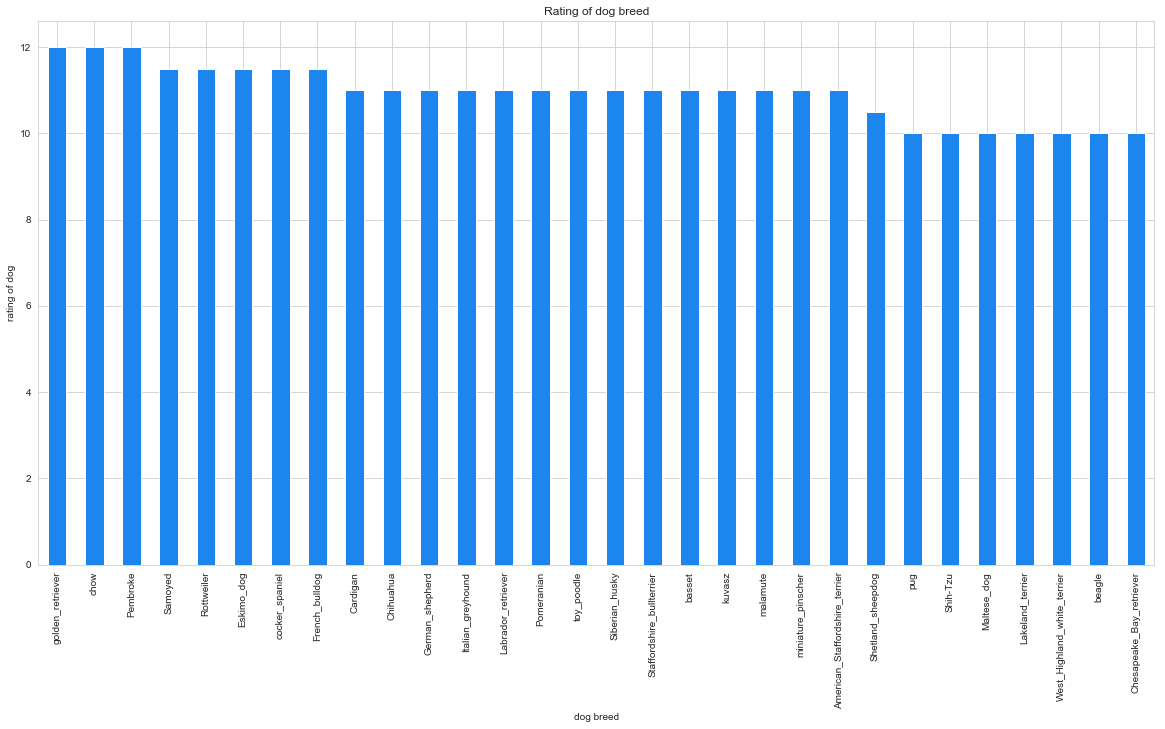

In [20]:
#plot the median value of dog score for each dog breed
breed_tested.groupby('dog_breed')['dog_score'].median().sort_values(ascending=False).plot(kind='bar', color='#1C86EE', figsize=(20,10));
plt.xlabel('dog breed');
plt.ylabel('rating of dog');
plt.title('Rating of dog breed');

So we see that when considering breeds that had atleast 15 or more dog count, the median rating was highest for golden retriever, chow and pembroke, followed by Samoyed, Rottweiler, Cocker spaniel and French bull dog.

We now see which dog breed tweet got the highest number loves and retweets.

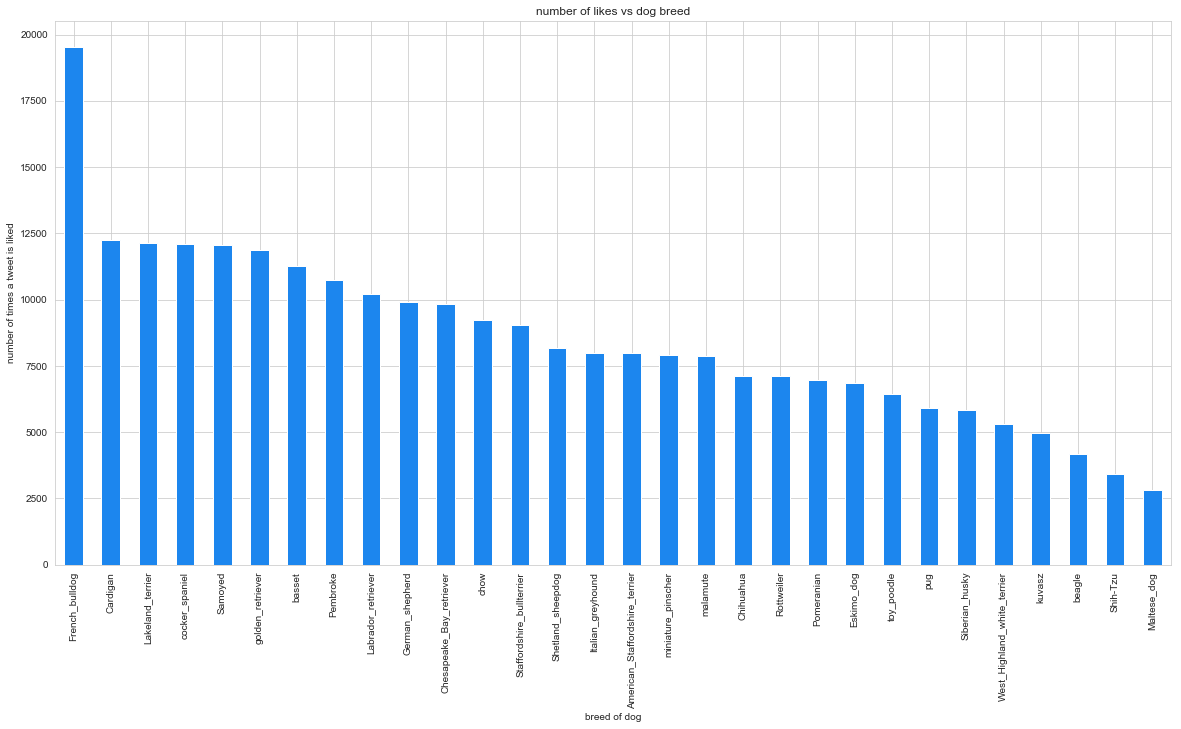

In [21]:
# distribution of number of times a tweet is liked by breed
breed_tested.groupby('dog_breed')['number_of_times_loved'].mean().sort_values(ascending=False).plot(kind='bar', color='#1C86EE', figsize=(20,10));
plt.xlabel("breed of dog");
plt.ylabel("number of times a tweet is liked");
plt.title('number of likes vs dog breed');

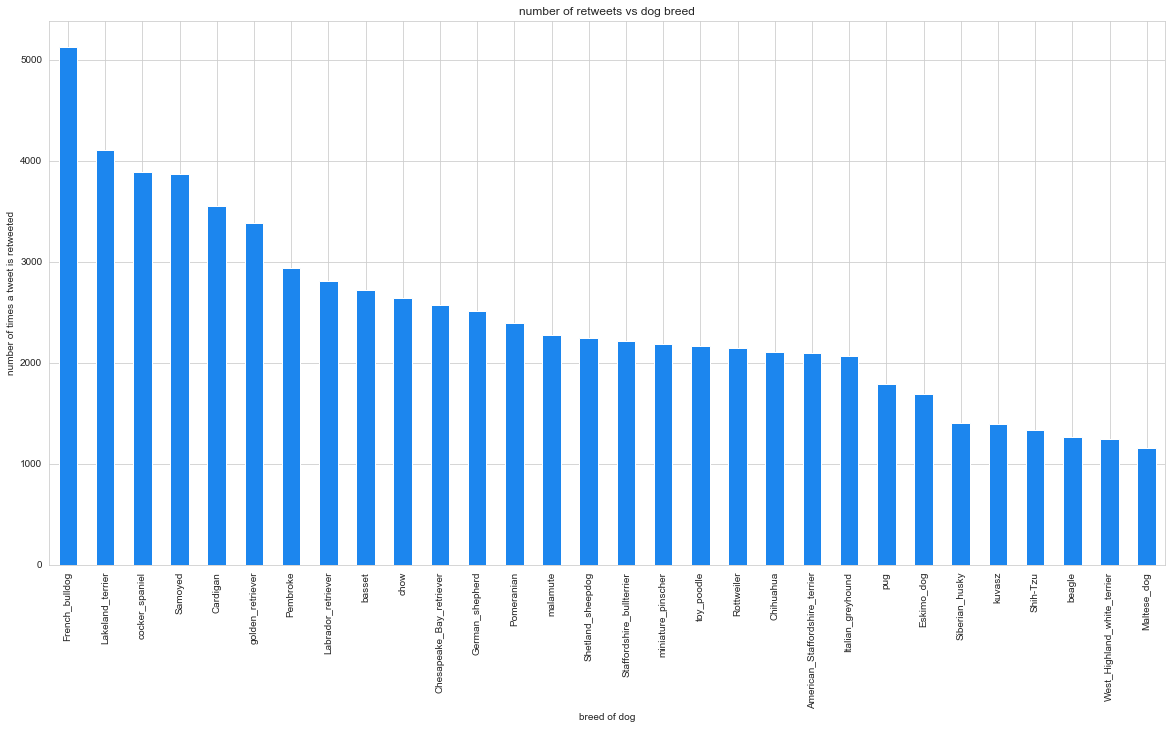

In [22]:
# distribution of number of times a tweet is retweeted by breed
breed_tested.groupby('dog_breed')['number_of_times_retweeted'].mean().sort_values(ascending=False).plot(kind='bar', color='#1C86EE', figsize=(20,10));
plt.xlabel("breed of dog");
plt.ylabel("number of times a tweet is retweeted");
plt.title('number of retweets vs dog breed');

We see French bull dog is the breed whose tweets get highest number of love and retweets.

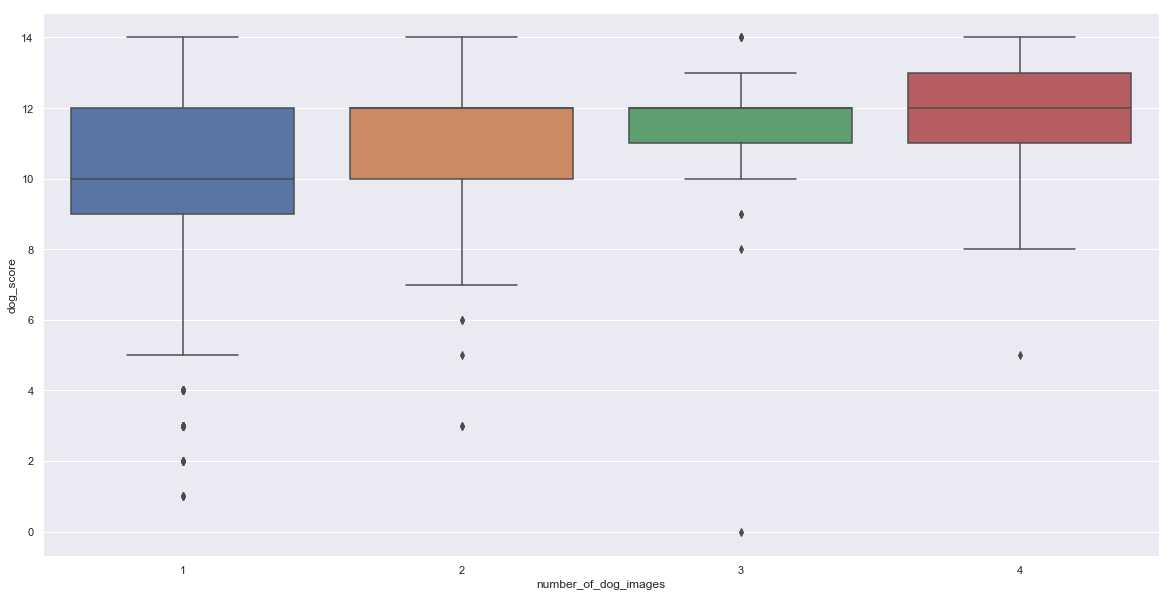

In [159]:
#box plot the dog_score vs the number of images to see the range of score for each image
ax=sns.boxplot(x=df_master.number_of_dog_images, y=df_master.dog_score);

In [164]:
#count for each image
df_master.number_of_dog_images.value_counts()

1    1384
2     281
4     112
3      99
Name: number_of_dog_images, dtype: int64

We see here as the number of images increase the dog_score seems to increase as well. More variation is observed in the dog_score when only one image is present. Although we do see there are way more tweet with just one image than the rest.That explains the variation observed.

I believe that people who send more photos take them from several angles. With such nice photos, the dogs appear more cute and hence they get a higher score.

In [166]:
#summary stats of dog score for each dog stage
df_master.groupby('dog_stage')['dog_score'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
None,1581.0,10.391524,2.234461,0.0,10.0,11.0,12.0,14.0
doggo,57.0,11.877193,1.402424,8.0,11.0,12.0,13.0,14.0
floofer,9.0,11.888889,1.054093,10.0,11.0,12.0,13.0,13.0
pupper,202.0,10.529703,1.748235,3.0,10.0,11.0,12.0,14.0
pupper & doggo,4.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0
puppo,23.0,12.043478,1.296087,9.0,11.5,12.0,13.0,14.0


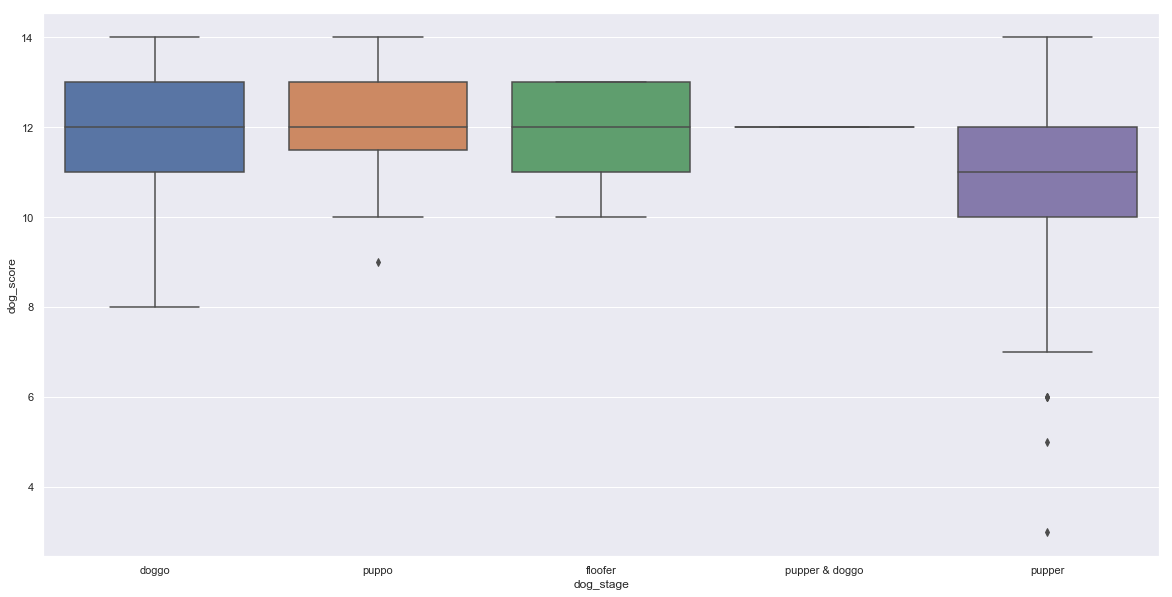

In [167]:
#remove all dogs that have None Stage and draw a box plot
ax=sns.boxplot(x=df_master[df_master['dog_stage']!='None']['dog_stage'], y=df_master.dog_score);

We see that the pupper have lower dog_score than the doggo, puppo and floofer.

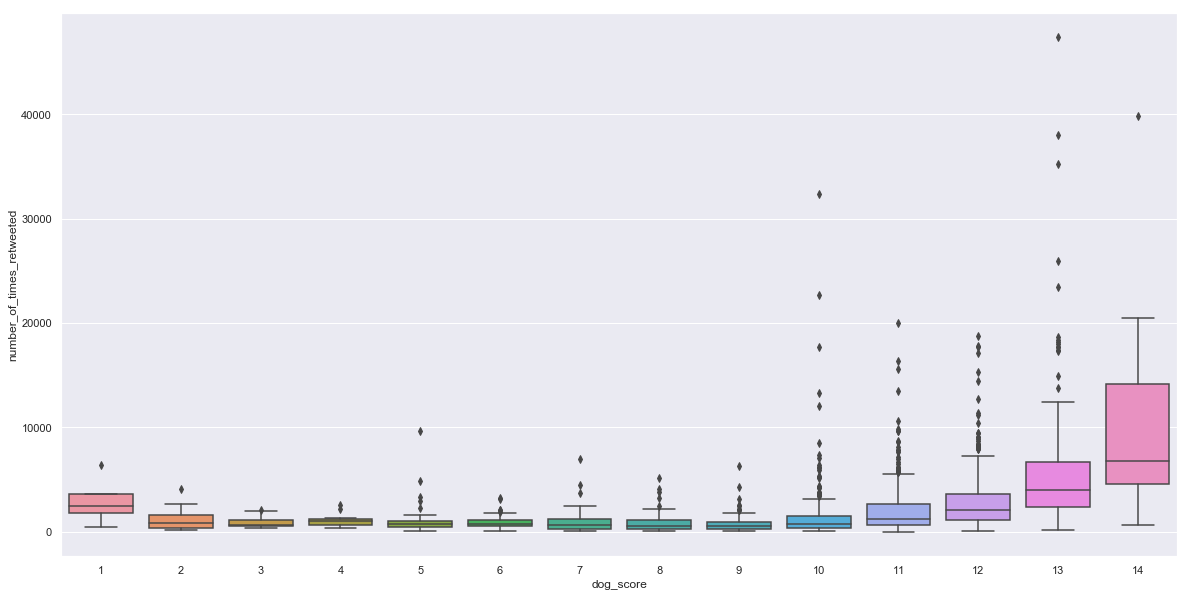

In [177]:
#box plot the dog_score vs the number_of_times_retweeted
ax=sns.boxplot(x=df_master.dog_score, y=df_master.number_of_times_retweeted);

We see that tweets with higher dog score are retweeted more often

In [163]:
# lets check the rating where dog_score=0
df_master[df_master.dog_score==0]

,tweet_id,tweet_date,tweet_year,tweet_month,tweet_text,dog_name,dog_stage,dog_score,total_score,number_of_times_retweeted,number_of_times_loved,number_of_dog_images,dog_breed,confidence_of_true_recognition,tweet_expanded_urls
469,835152434251116546,2017-02-24 15:40:31.000000,2017,2,When you're so blinded by your systematic plag...,None,None,0,10,3219,23460,3,American_Staffordshire_terrier,0.012731,https://twitter.com/dog_rates/status/835152434...


In [169]:
#we drop that row and save the file again.
df_master=df_master.drop(469)

In [60]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 15 columns):
tweet_id                          1875 non-null int64
tweet_date                        1875 non-null object
tweet_year                        1875 non-null int64
tweet_month                       1875 non-null int64
tweet_text                        1875 non-null object
dog_name                          1875 non-null object
dog_stage                         1875 non-null object
dog_score                         1875 non-null int64
total_score                       1875 non-null int64
number_of_times_retweeted         1875 non-null int64
number_of_times_loved             1875 non-null int64
number_of_dog_images              1875 non-null int64
dog_breed                         1875 non-null object
confidence_of_true_recognition    1875 non-null float64
tweet_expanded_urls               1875 non-null object
dtypes: float64(1), int64(8), object(6)
memory usage: 219.8+ KB


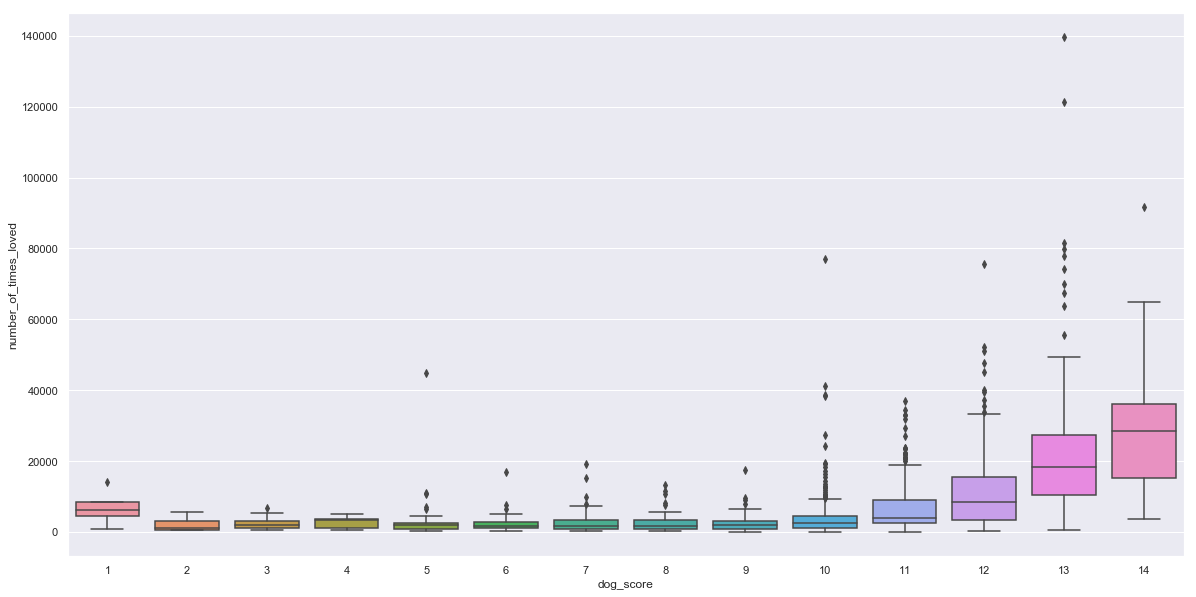

In [180]:
#box plot the dog_score vs the number_of_times_loved
ax=sns.boxplot(x=df_master.dog_score, y=df_master.number_of_times_loved);

Like before we see that tweets with higher dog score are liked more.

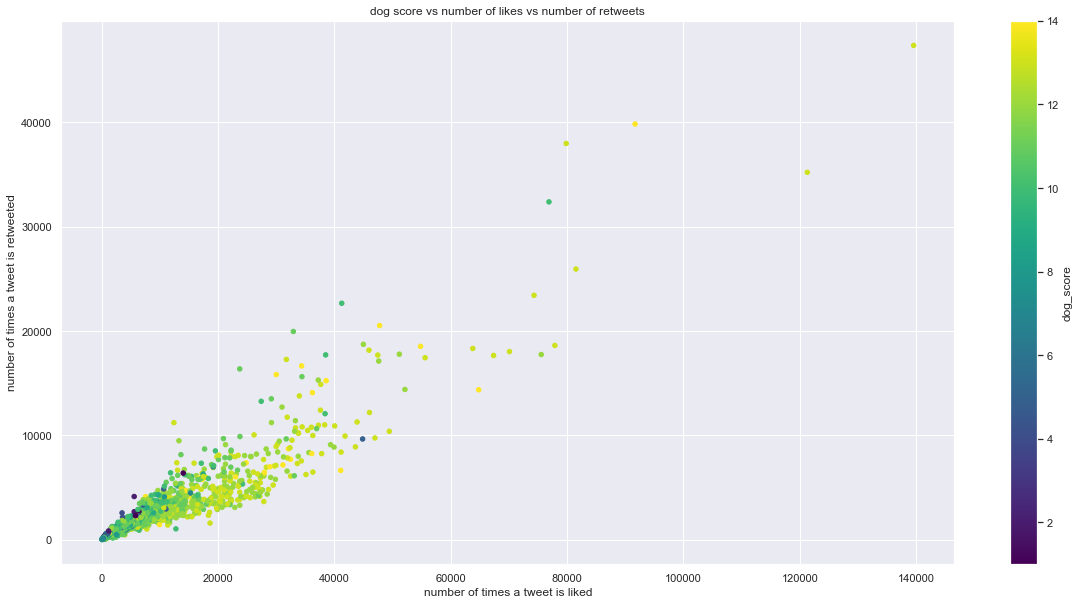

In [57]:
#dog_score's effect on number of times retweeted and loved
fig, ax = plt.subplots()
df_master.plot(kind='scatter',x='number_of_times_loved', y='number_of_times_retweeted', c='dog_score', colormap='viridis', ax=ax)
ax.set_xlabel("number of times a tweet is liked")
ax.set_ylabel("number of times a tweet is retweeted")
ax.set_title("dog score vs number of likes vs number of retweets")
plt.show()

The above scatter plot shows that as the rating increase the number of times the tweet is retweeted and liked also increases

In [46]:
# no of viral posts
(df_master[df_master.number_of_times_loved>=30000]).shape

(85, 15)

We can see that the dataset has 85 tweets that went viral meaning had atleast 30000 likes.

In [190]:
#let's find the min and max date of the dataset
max(df_master.tweet_date), min(df_master.tweet_date)

('2017-08-01 16:23:56.000000', '2015-11-15 22:32:08.000000')

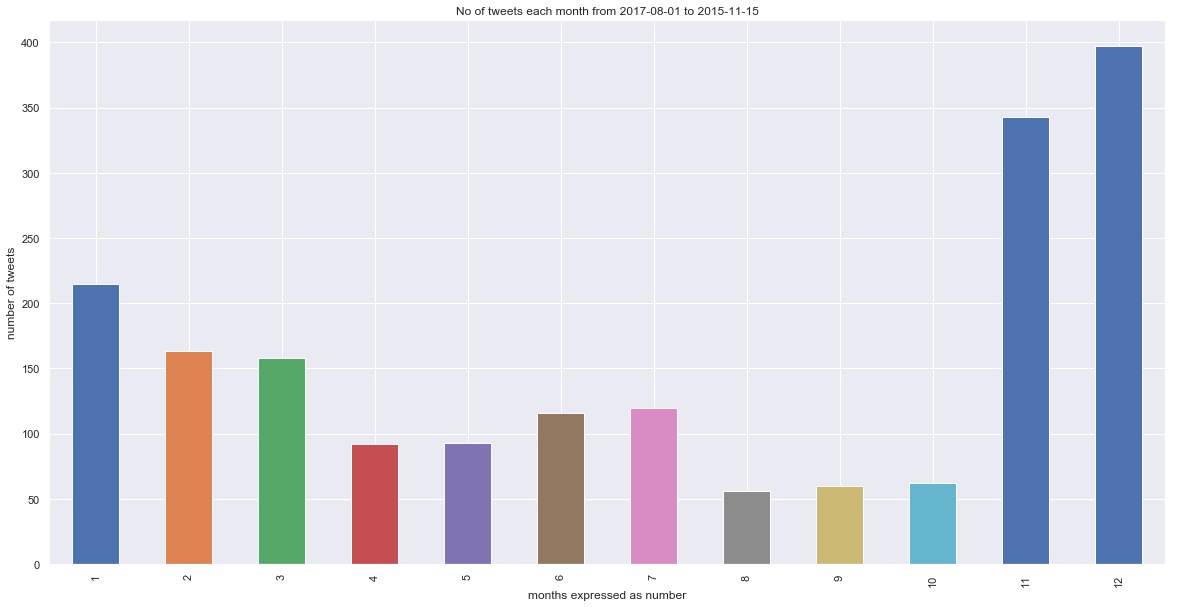

In [61]:
#number of tweets by month
df_master.groupby('tweet_month').size().plot(kind='bar',
                                    title="No of tweets each month from 2017-08-01 to 2015-11-15");
plt.xlabel('months expressed as number');
plt.ylabel('number of tweets');


Here we see that the number of tweets is higher in the months of November and December. I believe due to holiday season people enjoy time with their dogs and send photos more.

#### Conclusion
From our brief analysis of the data we saw that, golden_retriever dog breed was tweeted the highest number of times. Considering dog breeds that were tweeted atleast 15 times in the dataset we found that golden retriever, chow and pembroke got the highest rating. But in terms of number of love and retweets, French Bull dog received the highest number.

We saw that as the number of images increased the rating got better. We also saw a positive correlation between the rating and the number of loves and retweets a tweet recieved.

Also the number of tweets are higher during the holiday season. Indicating more people sent photos of their dogs for rating.

#### Reference:
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json.html
https://stackoverflow.com/questions/35807605/create-a-file-if-it-doesnt-exist?lq=1
https://www.w3schools.com/python/ref_func_open.asp
https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe
https://stackoverflow.com/questions/18250298/how-to-check-if-a-value-is-in-the-list-in-selection-from-pandas-data-frame
https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json/27901076
https://www.dataquest.io/blog/streaming-data-python/
https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
https://stackoverflow.com/questions/14057007/remove-rows-not-isinx
https://twittercommunity.com/t/entities-media-and-extended-entities-media/101012
https://stackoverflow.com/questions/23306653/python-accessing-nested-json-data
https://stackoverflow.com/questions/49985863/extract-json-values-using-just-regex
https://howchoo.com/g/zdvmogrlngz/python-regexes-findall-search-and-match
https://stackoverflow.com/questions/19932337/regex-look-between-two-strings-look-behind
https://stackoverflow.com/questions/11236006/identify-duplicate-values-in-a-list-in-python
https://stackoverflow.com/questions/12169170/find-the-max-of-two-or-more-columns-with-pandas
https://stackoverflow.com/questions/36603018/pandas-multiple-conditions-based-on-multiple-columns-using-np-where
https://stackoverflow.com/questions/36603018/pandas-multiple-conditions-based-on-multiple-columns-using-np-where
https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
https://stackoverflow.com/questions/28901683/pandas-get-rows-which-are-not-in-other-dataframe
https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column
https://stackoverflow.com/questions/25351968/how-to-display-full-non-truncated-dataframe-information-in-html-when-convertin/25352191
https://stackoverflow.com/questions/26246864/restoring-the-default-display-context-in-pandas
https://www.dataquest.io/blog/regular-expressions-data-scientists/
https://stackoverflow.com/questions/19384532/how-to-count-number-of-rows-per-group-and-other-statistics-in-pandas-group-by
https://stackoverflow.com/questions/31988322/pandas-update-sql
https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
https://stackoverflow.com/questions/43121584/matplotlib-scatterplot-x-axis-labels   